# 🧠 Neural Network from Scratch — Mathematical Explanation
This notebook explains the mathematical concepts behind a simple neural network trained on the XOR dataset.
It demonstrates forward propagation, backpropagation, and gradient descent optimisation, all implemented from first principles.


In [13]:
import numpy as np
import matplotlib.pyplot as plt


## 🧩 Define the Network Architecture

We’ll create a three-layer neural network:
- **Input layer:** 2 neurons  
- **Hidden layer:** 3 neurons  
- **Output layer:** 1 neuron


## 🧩 Define the Network Architecture

We’ll create a three-layer neural network:
- **Input layer:** 2 neurons  
- **Hidden layer:** 3 neurons  
- **Output layer:** 1 neuron


In [15]:
inputs = 2
hidden = 3
outputs = 1

np.random.seed(42)
W1 = np.random.randn(inputs, hidden)
b1 = np.zeros((1, hidden))
W2 = np.random.randn(hidden, outputs)
b2 = np.zeros((1, outputs))


## 2️⃣ Activation Function (Sigmoid)

The **sigmoid function** introduces non-linearity:

\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]

Its derivative is used during backpropagation:

\[
\sigma'(x) = \sigma(x) \times (1 - \sigma(x))
\]


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


## 3️⃣ Training Data — XOR Problem

The XOR logic gate outputs 1 only when the inputs differ.


In [17]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])


## 4️⃣ Training the Network

We’ll use **gradient descent optimisation** to minimise loss:

\[
L = \frac{1}{n} \sum (y - \hat{y})^2
\]

Each iteration:
1. Forward propagate  
2. Compute loss  
3. Backpropagate gradients  
4. Update weights


In [18]:
learning_rate = 0.1
epochs = 10_000
losses = []

for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_hat = sigmoid(z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((y - y_hat) ** 2)
    losses.append(loss)

    # Backpropagation (mathematical optimisation)
    d_loss = 2 * (y_hat - y)
    d_z2 = d_loss * sigmoid_derivative(y_hat)
    d_W2 = np.dot(a1.T, d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights using gradient descent
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2

    # Optional: print progress occasionally
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.3182
Epoch 1000, Loss: 0.1420
Epoch 2000, Loss: 0.0202
Epoch 3000, Loss: 0.0063
Epoch 4000, Loss: 0.0034
Epoch 5000, Loss: 0.0023
Epoch 6000, Loss: 0.0017
Epoch 7000, Loss: 0.0014
Epoch 8000, Loss: 0.0011
Epoch 9000, Loss: 0.0010


## 5️⃣ Visualising Learning Progress

The following plot shows how the model’s loss decreases over epochs:


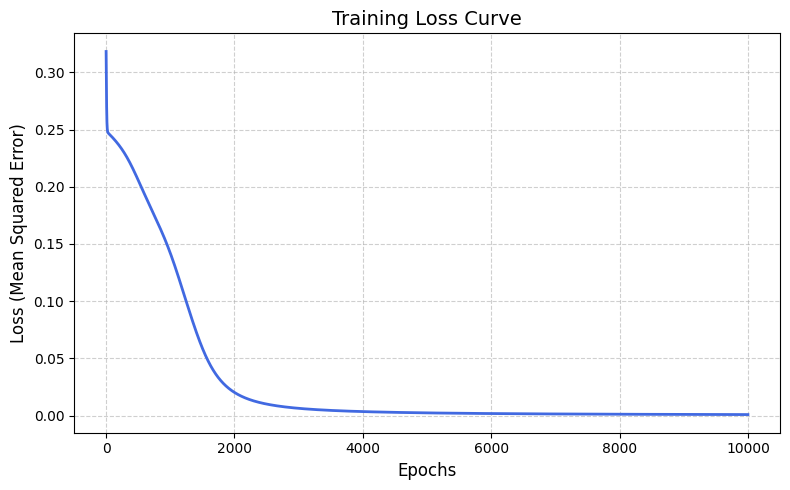

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(losses, color="royalblue", linewidth=2)
plt.title("Training Loss Curve", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (Mean Squared Error)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


## ✅ Final Predictions


In [20]:
print("Final predictions:")
print(y_hat.round(3))


Final predictions:
[[0.014]
 [0.971]
 [0.971]
 [0.038]]
